In [22]:
%pip install seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest, spearmanr
from scipy.stats import kruskal
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler


In [23]:
data = pd.read_csv('ingredient.csv')
data.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [24]:
# Display summary statistics and Variance
summary_stats = data.describe()
print(summary_stats)

                a           b           c           d           e           f  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

                g           h           i  
count  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009  
std      1.423153    0.497219    0.097439  
min      5.430000    0.000000    0.000000  
25%      8.240000    0.000000    0.000000  
50%   

In [25]:
#Check missing values
data.isnull().any()

a    False
b    False
c    False
d    False
e    False
f    False
g    False
h    False
i    False
dtype: bool

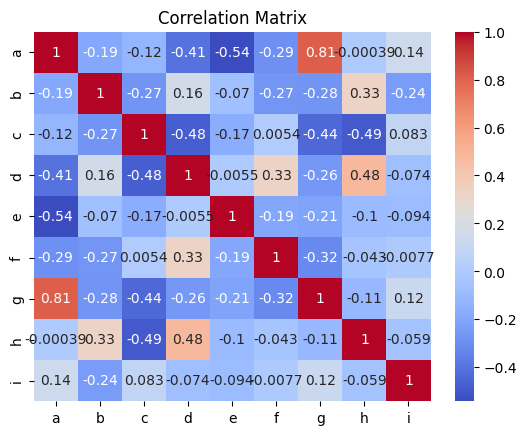

In [26]:
# Check for correlations
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [27]:
std_dev = data.std()
print(std_dev)


a    0.003037
b    0.816604
c    1.442408
d    0.499270
e    0.774546
f    0.652192
g    1.423153
h    0.497219
i    0.097439
dtype: float64


In [28]:
std_var = data.var()
print(std_var)

a    0.000009
b    0.666841
c    2.080540
d    0.249270
e    0.599921
f    0.425354
g    2.025366
h    0.247227
i    0.009494
dtype: float64


In [29]:
median = data.median()
print(median)

a     1.51768
b    13.30000
c     3.48000
d     1.36000
e    72.79000
f     0.55500
g     8.60000
h     0.00000
i     0.00000
dtype: float64


In [30]:
#ANOVA test
# Perform ANOVA test
f_statistic, p_value = f_oneway(data['a'], data['b'], data['c'], data['d'], data['e'], data['f'], data['g'], data['h'], data['i'])
print("ANOVA F-Statistic:", f_statistic)
print("ANOVA p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("The means are significantly different (reject null hypothesis)")
else:
    print("The means are not significantly different (fail to reject null hypothesis)")

ANOVA F-Statistic: 168331.96885835085
ANOVA p-value: 0.0
The means are significantly different (reject null hypothesis)


In [31]:
#Summary
# Mean and median are close to each other
# Not much variance except for c and g

Column: a
Summary Statistics:
count    214.000000
mean       1.518365
std        0.003037
min        1.511150
25%        1.516522
50%        1.517680
75%        1.519157
max        1.533930
Name: a, dtype: float64


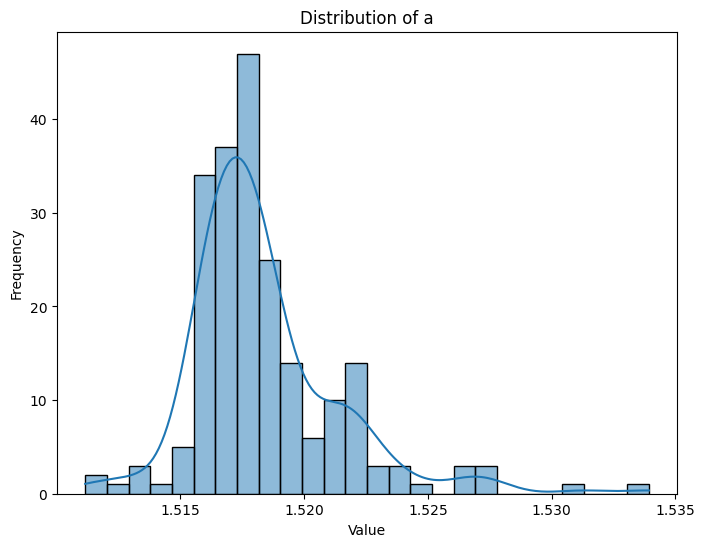

Column: b
Summary Statistics:
count    214.000000
mean      13.407850
std        0.816604
min       10.730000
25%       12.907500
50%       13.300000
75%       13.825000
max       17.380000
Name: b, dtype: float64


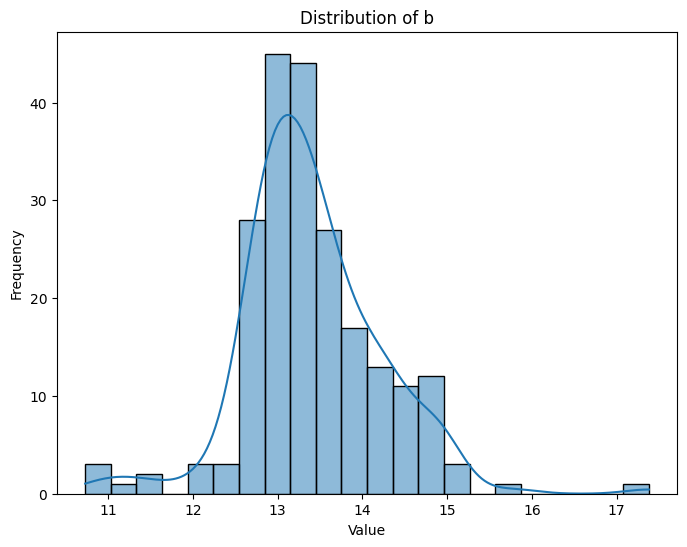

Column: c
Summary Statistics:
count    214.000000
mean       2.684533
std        1.442408
min        0.000000
25%        2.115000
50%        3.480000
75%        3.600000
max        4.490000
Name: c, dtype: float64


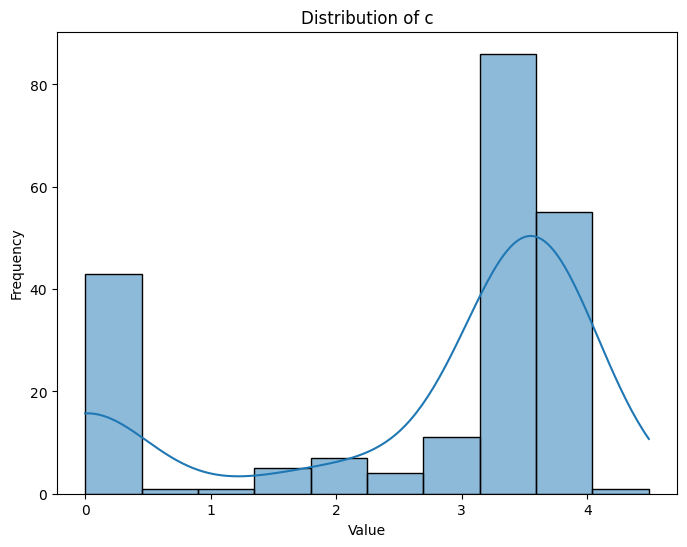

Column: d
Summary Statistics:
count    214.000000
mean       1.444907
std        0.499270
min        0.290000
25%        1.190000
50%        1.360000
75%        1.630000
max        3.500000
Name: d, dtype: float64


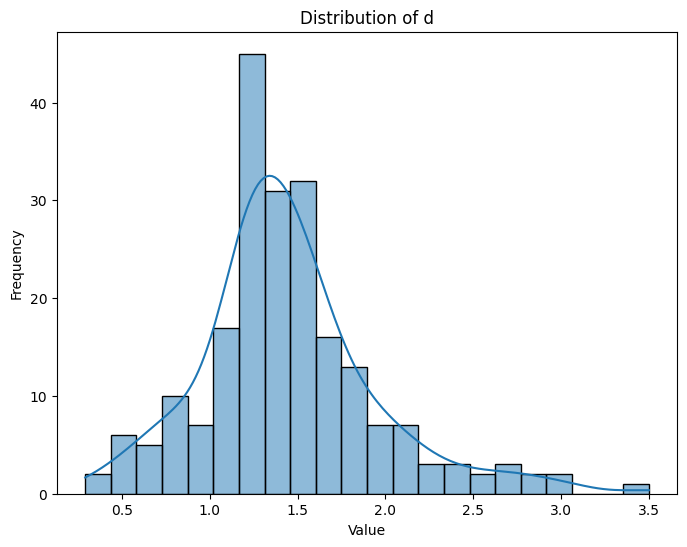

Column: e
Summary Statistics:
count    214.000000
mean      72.650935
std        0.774546
min       69.810000
25%       72.280000
50%       72.790000
75%       73.087500
max       75.410000
Name: e, dtype: float64


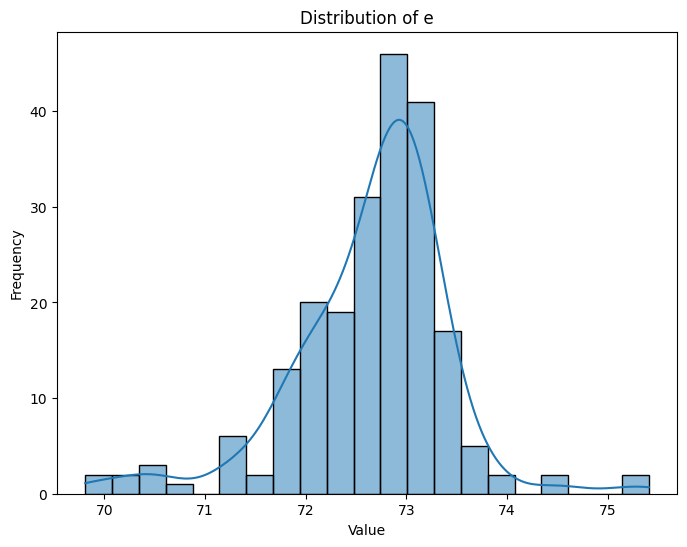

Column: f
Summary Statistics:
count    214.000000
mean       0.497056
std        0.652192
min        0.000000
25%        0.122500
50%        0.555000
75%        0.610000
max        6.210000
Name: f, dtype: float64


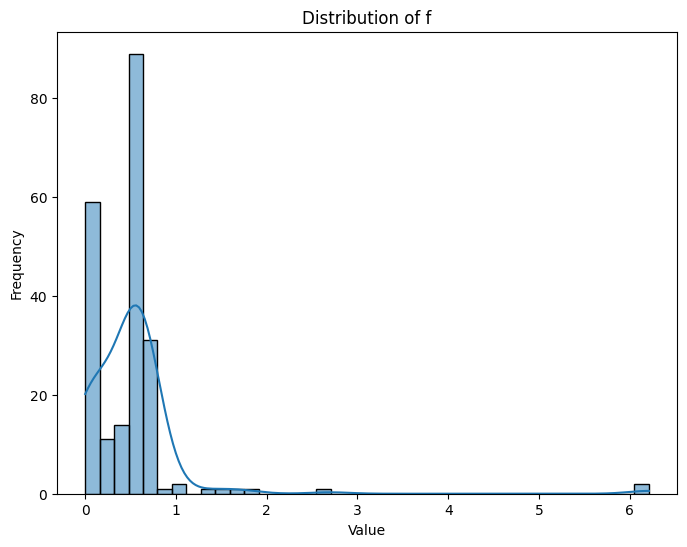

Column: g
Summary Statistics:
count    214.000000
mean       8.956963
std        1.423153
min        5.430000
25%        8.240000
50%        8.600000
75%        9.172500
max       16.190000
Name: g, dtype: float64


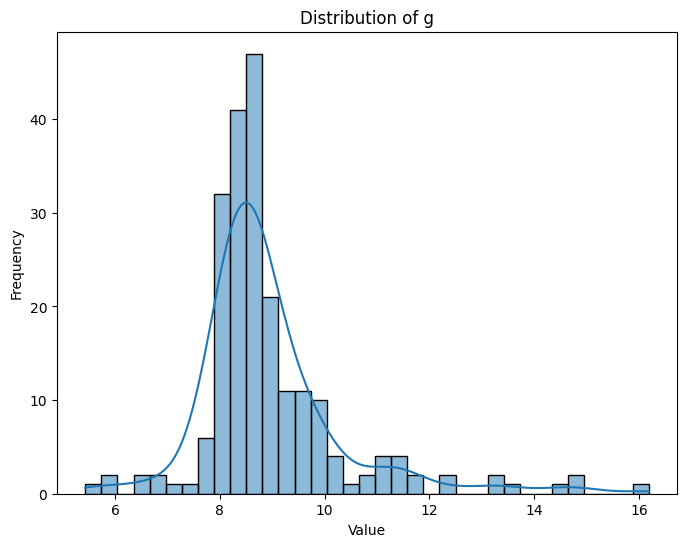

Column: h
Summary Statistics:
count    214.000000
mean       0.175047
std        0.497219
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.150000
Name: h, dtype: float64


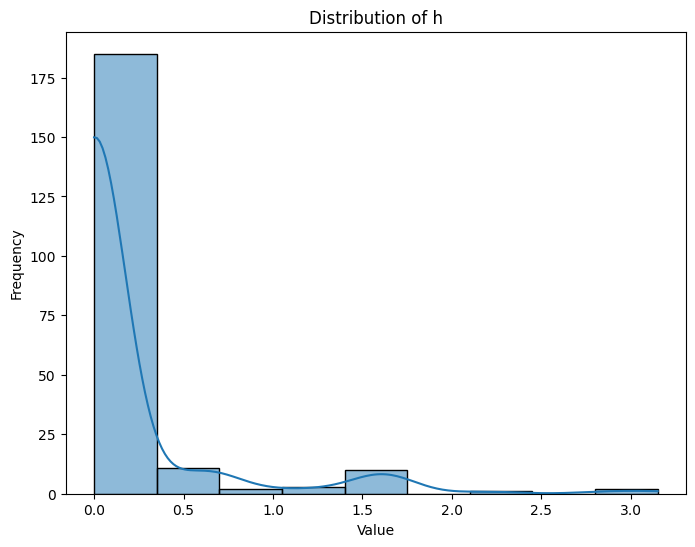

Column: i
Summary Statistics:
count    214.000000
mean       0.057009
std        0.097439
min        0.000000
25%        0.000000
50%        0.000000
75%        0.100000
max        0.510000
Name: i, dtype: float64


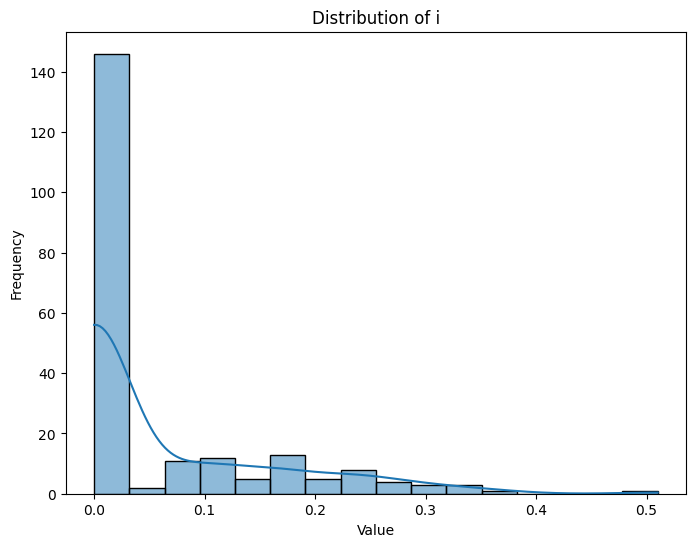

In [32]:

# Get column names
columns = data.columns

# Loop through each column
for column in columns:
    # Get column data
    df = data[column]
    
    # Summary statistics
    print(f"Column: {column}")
    print("Summary Statistics:")
    print(df.describe())
    
    # Distribution plot
    plt.figure(figsize=(8, 6))
    sns.histplot(df, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
    


In [33]:
#All the columns are normally distributed except f, h, i

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/sklearn/cluster/_km

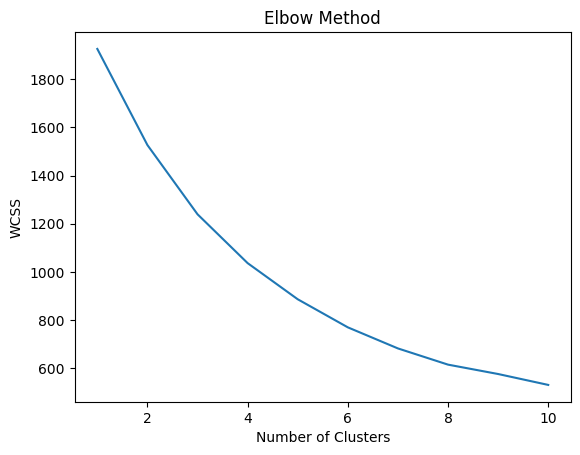

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                a          b         c         d          e         f  \
Cluster                                                                 
0        1.522572  13.395000  2.046042  1.132917  72.091458  0.227917   
1        1.517352  13.164265  3.408309  1.381250  72.810588  0.558529   
2        1.516229  14.532667  0.425000  2.232667  72.822333  0.649000   

                 g         h         i  
Cluster                                 
0        10.862708  0.076250  0.076875  
1         8.457647  0.010588  0.059706  
2         8.171333  1.078667  0.013000  


In [34]:
# Preprocess the Data
# Assuming the dataset contains only numerical features, we'll drop any non-numeric columns
# and handle missing values if necessary
data.dropna(inplace=True)
X = data

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the Number of Clusters
# We can use the Elbow Method to choose the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

# Apply K-means Clustering
# Based on the Elbow Method, choose the appropriate number of clusters
n_clusters = 3  # Adjust based on the elbow in the plot
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Analyze the Clustering Results
# Add cluster labels to the original dataset
data['Cluster'] = cluster_labels

# Interpret the Results
# Examine the characteristics of each cluster to provide physical and statistical proof
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

In [21]:
#Above Elbow method suggest the optimal number of cluster is 3